In [13]:
import pandas as pd
import polars as pl

In [14]:
df = pl.read_csv("data/df_with_category.csv")


In [15]:
df = df.with_columns([
    # Convert string to datetime
    pl.col("create_ts").str.to_datetime().alias("timestamp"),
    # Extract just the date part for grouping
    pl.col("create_ts").str.to_datetime().dt.date().alias("date")
])


In [16]:
daily_volume = df.group_by(["date", "category"]).agg([
    pl.col("contracts_traded").sum().alias("total_volume")
]).sort(["date", "category"])

In [17]:
p_df = daily_volume.to_pandas()

In [18]:
brypto_df = p_df[p_df['category'] == 'Crypto']

In [19]:
brypto_df['average'] = brypto_df.rolling(7)['total_volume'].mean()

/var/folders/09/fwj9ml5j17z0dlwbz1b4vwph0000gn/T/ipykernel_23829/3011599126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brypto_df['average'] = brypto_df.rolling(7)['total_volume'].mean()


In [20]:
brypto_df = brypto_df[:-1]

<Axes: xlabel='date'>

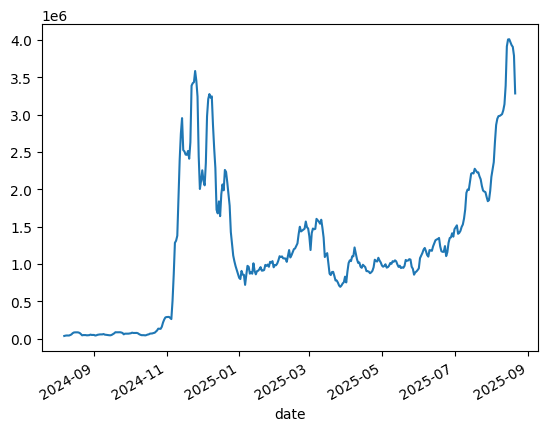

In [22]:
brypto_df.set_index('date')['average'].plot()

<Axes: xlabel='date'>

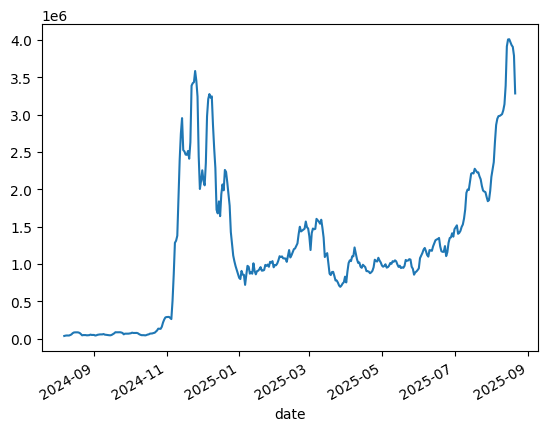

In [23]:
brypto_df.set_index('date')['average'].plot()

In [24]:
brypto_df.to_csv('daily_kalshi_volume.csv', index=None)